In [ ]:
from types import SimpleNamespace
from pathlib import Path
import os 
import numpy as np
from tabulate import tabulate

In [2]:
from sklearn.linear_model import LinearRegression

In [3]:
_ = Path('.').resolve()
os.chdir('../scripts')
from get_best_biases import main as get_biases
os.chdir(_)

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
import matplotlib.pyplot as plt
import copy

In [6]:
args = SimpleNamespace(
    corrf_multisim_path = Path('/global/cscratch1/sd/cramirez/QSO_clustering_analysis/corrf_from_cat_multibias'),
    corrf_box_name = 'high_3x2_600_bias3_multibias',
    theory_path = Path('/global/cscratch1/sd/cramirez/QSO_clustering_analysis/CoLoRe_boxes/high_3x2_600'),
    theory_lognormal = False,
    theory_source = 1,
    rsd = True,
    rmin = 0.1, 
    rmax = 200,
    N_bins = 41,
    zmin = 0.8,
    zmax = 2.1,
    nside = 2, 
    fitter_poles = [0],
    fitter_rmin = {0:30, 2:30},
    fitter_rmax = {0:80, 2:80},
    fitter_bias0 = 1,
    log_level = 'WARNING',
    print_values=False
)

# noRSD

In [7]:
class helper:
    def __str__(self):
        return self.label

lognormal = helper()
lognormal.label = 'lognormal'
lognormal.args = copy.copy(args)
lognormal.args.rsd = False
lognormal.args.corrf_box_name = 'high_3x2_600_bias3_multibias'
lognormal.in_b, lognormal.out_b = get_biases(lognormal.args)

lpt = helper()
lpt.label = '2LPT'
lpt.args = copy.copy(args)
lpt.args.rsd = False
lpt.args.corrf_box_name = 'high_3x2_600_2lpt_bias3_multibias'
lpt.in_b, lpt.out_b = get_biases(lpt.args)

for analysis in lognormal, lpt:
    analysis.in_b = np.asarray([float(b) for b in analysis.in_b])
    analysis.out_b= np.asarray([float(b) for b in analysis.out_b])

In [8]:
lognormal.color='blue'
lpt.color='red'

In [9]:
%matplotlib widget

In [12]:
for analysis in lognormal, lpt:
    analysis.model = LinearRegression()
    analysis.model.fit(analysis.in_b[1:].reshape((len(analysis.in_b[1:]), 1)), analysis.out_b[1:])

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
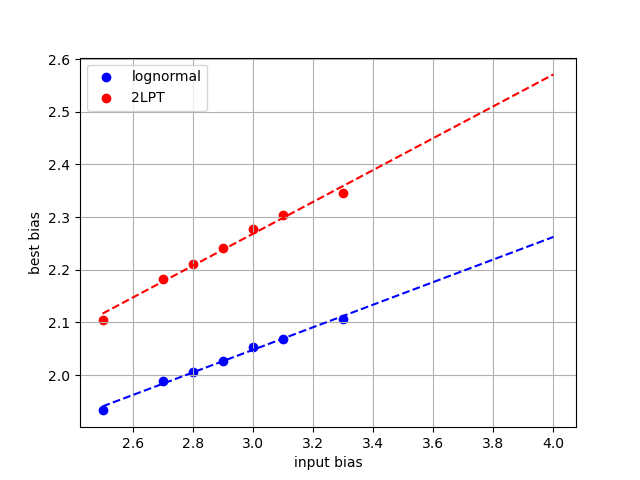

In [13]:
fig, ax = plt.subplots()

in_b = np.linspace(2.5, 4, 100)
for analysis in lognormal,lpt:
    ax.scatter(analysis.in_b[1:], analysis.out_b[1:], c=analysis.color, label=analysis)
    ax.plot(in_b, analysis.model.predict(in_b.reshape((len(in_b)),1)), c=analysis.color, linestyle='dashed')

ax.legend()
ax.grid()
ax.set_xlabel('input bias')
ax.set_ylabel('best bias');

In [14]:
for analysis in lognormal, lpt:
    print(analysis)
    table = np.asarray([analysis.in_b, analysis.out_b])
    print(tabulate(table.transpose(), headers=['in B', 'best B'], floatfmt=".2f"))
    print('\n')

lognormal
  in B    best B
------  --------
  0.00      0.05
  2.50      1.93
  2.70      1.99
  2.80      2.01
  2.90      2.03
  3.00      2.05
  3.10      2.07
  3.30      2.11


2LPT
  in B    best B
------  --------
  0.00      0.02
  2.50      2.11
  2.70      2.18
  2.80      2.21
  2.90      2.24
  3.00      2.28
  3.10      2.30
  3.30      2.35




In [15]:
def get_b_from_B(B, analysis):
    return (B-analysis.model.intercept_)/analysis.model.coef_

In [16]:
get_b_from_B(2.145, lognormal)

array([3.45320328])

In [17]:
get_b_from_B(2.145, lpt)

array([2.59339689])

# RSD

In [22]:
class helper:
    def __str__(self):
        return self.label

lognormal = helper()
lognormal.label = 'lognormal'
lognormal.args = copy.copy(args)
lognormal.args.rsd = True
lognormal.args.corrf_box_name = 'high_3x2_600_bias3_multibias'
lognormal.in_b, lognormal.out_b = get_biases(lognormal.args)

lpt = helper()
lpt.label = '2LPT'
lpt.args = copy.copy(args)
lpt.args.rsd = True
lpt.args.corrf_box_name = 'high_3x2_600_2lpt_bias3_multibias'
lpt.in_b, lpt.out_b = get_biases(lpt.args)

for analysis in lognormal, lpt:
    analysis.in_b = np.asarray([float(b) for b in analysis.in_b])
    analysis.out_b= np.asarray([float(b) for b in analysis.out_b])

In [23]:
lognormal.color='blue'
lpt.color='red'

In [24]:
inb, outb = get_biases(args)

In [25]:
for analysis in lognormal, lpt:
    analysis.model = LinearRegression()
    analysis.model.fit(analysis.in_b[1:].reshape((len(analysis.in_b[1:]), 1)), analysis.out_b[1:])

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
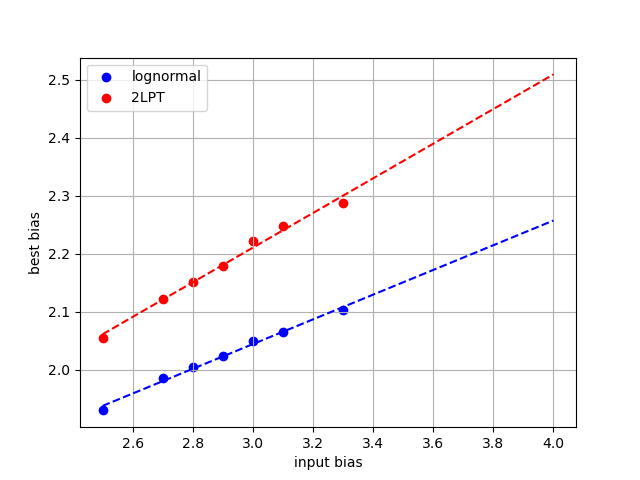

In [26]:
fig, ax = plt.subplots()

in_b = np.linspace(2.5, 4, 100)
for analysis in lognormal,lpt:
    ax.scatter(analysis.in_b[1:], analysis.out_b[1:], c=analysis.color, label=analysis)
    ax.plot(in_b, analysis.model.predict(in_b.reshape((len(in_b)),1)), c=analysis.color, linestyle='dashed')

ax.legend()
ax.grid()
ax.set_xlabel('input bias')
ax.set_ylabel('best bias');

In [27]:
for analysis in lognormal, lpt:
    print(analysis)
    table = np.asarray([analysis.in_b, analysis.out_b])
    print(tabulate(table.transpose(), headers=['in B', 'best B']))
    print('\n')

lognormal
  in B     best B
------  ---------
   0    0.0196022
   2.5  1.93003
   2.7  1.98518
   2.8  2.00498
   2.9  2.02374
   3    2.04969
   3.1  2.06474
   3.3  2.10286


2LPT
  in B     best B
------  ---------
   0    0.0181449
   2.5  2.05468
   2.7  2.1227
   2.8  2.15103
   2.9  2.1787
   3    2.2229
   3.1  2.24731
   3.3  2.28811




In [28]:
def get_b_from_B(B, analysis):
    return (B-analysis.model.intercept_)/analysis.model.coef_

In [29]:
get_b_from_B(2.145, lognormal)

array([3.47226724])

In [30]:
get_b_from_B(2.145, lpt)

array([2.7802581])